In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from Backtesting import *

In [3]:
directory = "O:/AARM/Direct/Top Holdings/Research/Biotech/NW/"

bt_data = BacktesterData(
    holdings_path=directory + 'Output/holdings.csv',
    sec_master_path=directory + 'Output/security_master.csv',
    sec_mapping_path=directory + 'Output/security_mapping.csv',
    sec_out_path=directory + 'Output/security_out.csv',
    managers_path=directory + 'Input/managers.xlsx'
)

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
bt = FilingBacktester(bt_data)

In [5]:
consolidated_error_df = bt_data.error_df.groupby(['Ticker', 'Name']).agg({
    'holding_date': ['min', 'max'],
    'value': 'sum',
    'Min_Px_Date': 'min',
    'Max_Px_Date': 'max'
}).reset_index()
consolidated_error_df.columns = ['Ticker', 'Name', 'min_holding_date', 'max_holding_date', 'value', 'Min_Px_Date', 'Max_Px_Date']
consolidated_error_df = consolidated_error_df.sort_values('value', ascending=False)

# Exclude securities I have already verified are from erroneus filings
excluded_tickers = ['SVA US', #Private, reported holdings values are stale
                    'DCPH US', #Acquired
                    'BLU CN', #Acquired
                    'ZGNX US', #Acquired
                    '1284849DUS', #Acquired
                    'ALPN US', #Acquired
                    'PRXL US', #Delisted
                    'QP/ LN', #Private
                    ]
consolidated_error_df = consolidated_error_df[~consolidated_error_df['Ticker'].isin(excluded_tickers)]

print("Top errors by value:")
# Set display options to show more rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
print(consolidated_error_df)

Top errors by value:
                   Ticker                                          Name min_holding_date max_holding_date      value Min_Px_Date Max_Px_Date
68                VYNE US                        VYNE Therapeutics Inc.       2014-12-31       2017-12-31  661.76397  2018-01-24  2025-05-15
0   #N/A Invalid Security                                    IMARA Inc.       2020-03-31       2022-12-31  484.23242         NaT         NaT
42                NEUP US                   Neuphoria Therapeutics Inc.       2017-06-30       2021-09-30  226.42897  2021-12-15  2025-05-15
70                ZCOR US                            Zyla Life Sciences       2014-12-31       2018-12-31  114.06768  2019-03-21  2020-05-18
3              1891847DUS                 Centrexion Therapeutics Corp.       2018-03-31       2024-12-31   95.24072         NaT         NaT
66                VRNA US                             Verona Pharma plc       2014-12-31       2017-03-31   92.45430  2017-04-26  202

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
bt.get_holdings_dataset('Saturn V')

,date,ticker,value,shares,share_change,price,market_cap,value_traded,ownership,ownership_change,allocation,allocation_change,cost_basis
0,2022-12-31,ALBO US,7.38688,341827.0,341827.0,21.61000,447.3547,3.483726e+06,0.016512,0.016512,0.056122,0.056122,21.610000
1,2022-12-31,APLS US,10.97953,212329.0,212329.0,51.71000,5717.8615,5.137383e+07,0.001920,0.001920,0.083417,0.083417,51.710000
2,2022-12-31,ARQT US,7.21025,487179.0,487179.0,14.80000,901.7318,9.847032e+06,0.007996,0.007996,0.054780,0.054780,14.800000
3,2022-12-31,ASND US,8.35418,68404.0,68404.0,122.13000,6964.7368,4.943529e+07,0.001199,0.001199,0.063471,0.063471,122.130000
4,2022-12-31,ATXS US,2.52375,169493.0,169493.0,14.89000,390.0193,1.099492e+06,0.006471,0.006471,0.019174,0.019174,14.890000
5,2022-12-31,BCRX US,3.90507,340163.0,340163.0,11.48000,2140.1456,2.650415e+07,0.001825,0.001825,0.029669,0.029669,11.480000
6,2022-12-31,BIIB US,2.12121,7660.0,7660.0,276.92000,39876.8688,3.299973e+08,0.000053,0.000053,0.016116,0.016116,276.920000
7,2022-12-31,CBAY US,10.10585,1611778.0,1611778.0,6.27000,530.9503,1.916589e+06,0.019034,0.019034,0.076779,0.076779,6.270000
8,2022-12-31,CRNX US,11.41589,623819.0,623819.0,18.30000,984.7317,4.706961e+06,0.011593,0.011593,0.086732,0.086732,18.300000
9,2022-12-31,CYTK US,9.02572,196982.0,196982.0,45.82000,4335.9925,4.363988e+07,0.002082,0.002082,0.068573,0.068573,45.820000


In [10]:
mkt_cap = bt.sec_mkt_cap_df
eligible = bt.eligible_securities_df
rets = bt.sec_rets_df
valid_rets = (rets == 0).sum(axis=1) < 0.9*len(rets.columns)
mkt_cap = mkt_cap.multiply(eligible)
mkt_cap = mkt_cap.replace(0, np.nan)
mkt_cap = mkt_cap.loc[valid_rets]
rets = rets.loc[valid_rets]

# Size
size_score = np.log(mkt_cap)
size_score = bt.standardize_factor_scores(size_score).shift(1)

# Separate Reversal (short-term) and Momentum (long-term) factors
MOMENTUM_LONG_PERIOD = 252 #~1 year
REVERSAL_PERIOD = 21 #~1 month

# Long-term momentum component
# Calculate returns excluding the most recent REVERSAL_PERIOD (21 days)
# and including only the period from t-MOMENTUM_LONG_PERIOD to t-REVERSAL_PERIOD
momentum_score = np.log(rets+1).shift(REVERSAL_PERIOD).rolling(window=MOMENTUM_LONG_PERIOD-REVERSAL_PERIOD, min_periods=63).mean().fillna(0)
momentum_score = bt.standardize_factor_scores(momentum_score).shift(1)

# Short-term reversal component (negative of short-term returns)
reversal_score = -np.log(rets+1).ewm(halflife=REVERSAL_PERIOD, adjust=True).mean().fillna(0)
reversal_score = bt.standardize_factor_scores(reversal_score).shift(1)

factor_scores = {'Size': size_score, 'Momentum': momentum_score, 'Reversal': reversal_score}
factor_rets = bt.get_factor_returns(factor_scores)

Error fitting model for 2010-01-05 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-06 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-07 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-08 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-11 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-12 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-13 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-14 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-15 00:00:00: zero-size array to reduction operation maxi

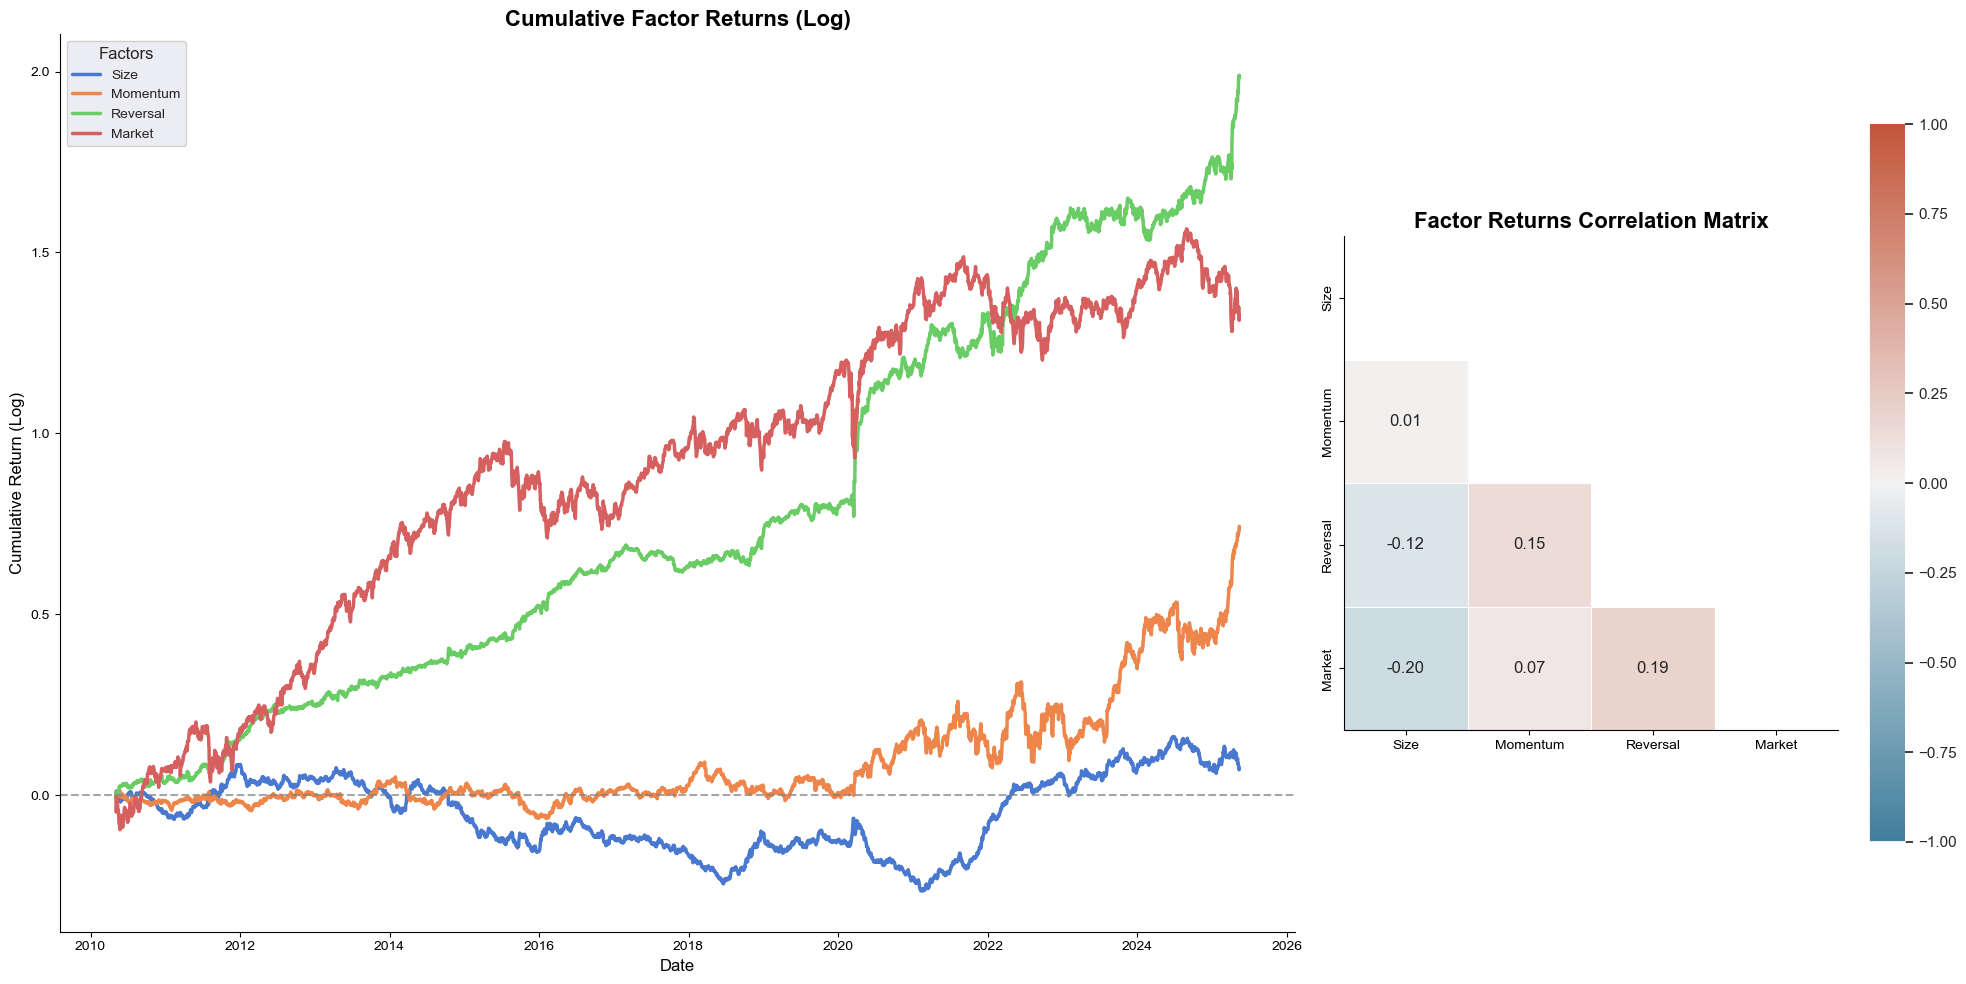

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

factor_rets_filtered = factor_rets.dropna(how='all')
factor_rets_clean = factor_rets_filtered.fillna(0)
cum_factor_rets = np.log(1 + factor_rets_clean).cumsum()

# Create a figure with side-by-side subplots
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Set the seaborn style
sns.set_theme(style="darkgrid")

# Plot 1: Cumulative Factor Returns
sns.lineplot(data=cum_factor_rets, dashes=False, linewidth=2.5, palette="muted", ax=ax1)

# Enhance the plot with better formatting
ax1.set_title('Cumulative Factor Returns (Log)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Return (Log)', fontsize=12)
ax1.legend(title='Factors', title_fontsize=12, fontsize=10, frameon=True, framealpha=0.9)

# Add a zero line for reference
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Plot 2: Factor Return Correlations
corr_matrix = factor_rets_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax2)

ax2.set_title('Factor Returns Correlation Matrix', fontsize=16, fontweight='bold')

# Format the plots
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

In [80]:
MIN_PCT = 0.001 #Dropping holdings below 0.1% of portfolio
MIN_MV = 1 #Dropping holdings below $1M
MAX_MKT_CAP = 100000 #Dropping holdings above $100M
MAX_ALLOC = 0.2 #Winsorizing holdings above 20% of portfolio
MAX_OWNERSHIP = 0.1 #Winsorizing ownership above 50%
MIN_PRICE = 0.50
MIN_VALUE_TRADED = 1000000


quarter_ends = pd.date_range(
    start=pd.Timestamp('2014-09-30'),
    end=pd.Timestamp('2025-03-31'),
    freq='QE'  # Quarter end frequency (updated from 'Q')
)

quarter_ends_delayed = quarter_ends + pd.DateOffset(days=45)  # Convert to DatetimeIndex instead of list
#future_idio_returns = bt.get_period_idio_returns(factor_scores, factor_rets, dates=quarter_ends_delayed).shift(-1) #shift back one quarter to align with fund holdings

calendar_quarter_total_returns = bt.get_period_returns(dates=quarter_ends).shift(-1) #shift back one quarter to align with fund holdings
quarter_returns_long = calendar_quarter_total_returns.reset_index().melt(
    id_vars=['quarter_end'], 
    var_name='ticker', 
    value_name='return'
)
lscibc = quarter_returns_long[quarter_returns_long['ticker'] == 'LSCIBC']
lscibc = lscibc.drop('ticker', axis=1)
lscibc.columns = ['date', 'lscibc']

quarter_ends_and_filing_dates = pd.DatetimeIndex(quarter_ends_delayed.union(quarter_ends)).sort_values()
#pre_filing_idio_returns = bt.get_period_idio_returns(factor_scores, factor_rets, dates=quarter_ends_and_filing_dates)
#pre_filing_idio_returns = pre_filing_idio_returns.reindex(index=quarter_ends_delayed)

fund_list = bt.manager_df[~(bt.manager_df['Public_Start'].isna() | bt.manager_df['Public_End'].isna())]['Master'].unique()# | bt.manager_df['Contamination'] | bt.manager_df['Not_Biotech'])]['Master'].unique()
#fund_list = bt.manager_df['Master'].unique()

# Collect all holdings data and compile into a single dataset
all_datasets = []

for fund in fund_list:

    dataset = bt.get_holdings_dataset(fund)
    # Join calendar quarter total returns to the dataset
    if not dataset.empty:

        dataset = dataset.merge(quarter_returns_long, 
                               left_on=['date', 'ticker'], 
                               right_on=['quarter_end', 'ticker'], 
                               how='left')
        
        dataset = dataset.merge(lscibc, on='date', how='left')
        dataset['relative_return'] = dataset['return'] - dataset['lscibc']
        
        dataset = dataset[(dataset['value'] >= MIN_MV) &
                          (dataset['allocation'] >= MIN_PCT) &
                          (dataset['market_cap'] <= MAX_MKT_CAP) &
                          (dataset['price'] >= MIN_PRICE) &
                          (dataset['value'] >= MIN_VALUE_TRADED)]
        
        dataset['allocation'] = dataset['allocation'].clip(upper=MAX_ALLOC)
        dataset['ownership'] = dataset['ownership'].clip(upper=MAX_OWNERSHIP)
        dataset['allocation_change'] = dataset['allocation_change'].clip(upper=MAX_ALLOC, lower=-MAX_ALLOC)
        dataset['ownership_change'] = dataset['ownership_change'].clip(upper=MAX_OWNERSHIP, lower=-MAX_OWNERSHIP)

        # Add fund name to the dataset
        dataset['fund'] = fund
        all_datasets.append(dataset)

# Compile all data into a single dataset
if all_datasets:
    compiled_dataset = pd.concat(all_datasets, ignore_index=True)
else:
    compiled_dataset = pd.DataFrame()

In [79]:
print(compiled_dataset)

Empty DataFrame
Columns: [date, ticker, value, shares, share_change, price, market_cap, value_traded, ownership, ownership_change, allocation, allocation_change, cost_basis, quarter_end, return, lscibc, relative_return, fund]
Index: []


In [ ]:
# Plot relationship between multiple variables and returns for each fund
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define variables to plot
variables = ['allocation', 'allocation_change', 'ownership', 'ownership_change']
var_labels = ['Allocation (%)', 'Allocation Change (%)', 'Ownership (%)', 'Ownership Change (%)']

# Get unique funds from compiled dataset
unique_funds = compiled_dataset['fund'].unique()

# Calculate number of rows and columns for subplots
n_funds = len(unique_funds)
n_cols = 4
n_rows = (n_funds + n_cols - 1) // n_cols

# Create separate plots for each variable
for var_idx, (var_name, var_label) in enumerate(zip(variables, var_labels)):
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for i, fund in enumerate(unique_funds):
        fund_data = compiled_dataset[compiled_dataset['fund'] == fund].copy()
        
        # Skip if no relative_return data
        if fund_data['relative_return'].isna().all():
            axes[i].text(0.5, 0.5, f'{fund}\nNo relative return data', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(fund)
            continue
        
        # Remove NaN values for plotting
        plot_data = fund_data.dropna(subset=['relative_return', var_name])
        
        if len(plot_data) == 0:
            axes[i].text(0.5, 0.5, f'{fund}\nNo valid data', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(fund)
            continue
        
        # Create scatter plot
        scatter = axes[i].scatter(plot_data[var_name], plot_data['relative_return'], 
                                 alpha=0.6, s=30)
        
        # Add trend line if we have enough data points
        if len(plot_data) > 5:
            try:
                z = np.polyfit(plot_data[var_name], plot_data['relative_return'], 1)
                p = np.poly1d(z)
                x_trend = np.linspace(plot_data[var_name].min(), plot_data[var_name].max(), 100)
                axes[i].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=1)
                
                # Calculate correlation
                corr = plot_data[var_name].corr(plot_data['relative_return'])
                axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                            transform=axes[i].transAxes, 
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
            except:
                pass
        
        # Format axes
        axes[i].set_xlabel(var_label)
        axes[i].set_ylabel('Quarterly Relative Return')
        axes[i].set_title(fund)
        axes[i].grid(True, alpha=0.3)
        
        # Format x-axis to show values as percentages for allocation and ownership variables
        if var_name in ['allocation', 'allocation_change', 'ownership', 'ownership_change']:
            axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.1f}%'))

    # Hide empty subplots
    for i in range(n_funds, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.suptitle(f'{var_label} vs Quarterly Relative Returns by Fund', fontsize=16, y=1.02)
    plt.show()

    # Summary statistics for this variable
    print(f"\nSummary: {var_label} vs Relative Return Correlations by Fund")
    print("=" * 80)

    correlations = []
    for fund in unique_funds:
        fund_data = compiled_dataset[compiled_dataset['fund'] == fund].copy()
        clean_data = fund_data.dropna(subset=['relative_return', var_name])
        
        if len(clean_data) > 5:
            corr = clean_data[var_name].corr(clean_data['relative_return'])
            
            # Calculate regression coefficient and t-statistic with heteroskedasticity-robust standard errors
            X = sm.add_constant(clean_data[var_name])
            y = clean_data['relative_return']
            
            try:
                model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 is robust to heteroskedasticity
                coeff = model.params.iloc[1]  # Coefficient for the variable (not intercept)
                t_stat = model.tvalues.iloc[1]  # T-statistic for the variable
                p_value = model.pvalues.iloc[1]  # P-value for the variable
            except:
                coeff = np.nan
                t_stat = np.nan
                p_value = np.nan
            
            correlations.append({
                'Fund': fund, 
                'Correlation': corr, 
                'Coefficient': coeff,
                'T-Stat': t_stat,
                'P-Value': p_value,
                'N_Observations': len(clean_data)
            })

    if correlations:
        corr_df = pd.DataFrame(correlations).sort_values('T-Stat', ascending=False)
        print(corr_df.to_string(index=False, float_format='%.3f'))
    else:
        print("No valid correlations to display")
    
    print("\n" + "="*80 + "\n")


ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [70]:
# LightGBM Model Training with Walk-Forward Validation
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
import numpy as np
import pandas as pd

# Set up base parameters for LightGBM
BASE_PARAMS = dict(
    objective="regression",
    learning_rate=0.03,      # slower → stabler
    n_estimators=1000,       # rely on early-stop
    feature_fraction=0.8,    # column subsample
    bagging_fraction=0.8,    # row subsample
    bagging_freq=1,
    lambda_l1=0.1, lambda_l2=1.0,  # regularise small samples
    random_state=0,
    verbose=-1,              # suppress LightGBM output
    force_row_wise=True      # suppress auto-choosing messages
)

# Define features and target
FEATURES = ['allocation', 'allocation_change', 'ownership', 'ownership_change']
TARGET = 'relative_return'

print("Training LightGBM Models with Walk-Forward Validation")
print("=" * 80)

models = {}
walk_forward_results = []
all_predictions = []

for fund, fund_data in compiled_dataset.groupby("fund", sort=False):
    # Sort by date and prepare data
    fund_data = fund_data.sort_values("date").reset_index(drop=True)
    
    # Remove rows with missing values in features or target
    clean_data = fund_data.dropna(subset=FEATURES + [TARGET])
    
    if len(clean_data) < 30:  # Need minimum observations for meaningful training
        print(f"Skipping {fund}: insufficient data ({len(clean_data)} observations)")
        continue
    
    X, y = clean_data[FEATURES], clean_data[TARGET]
    dates = clean_data['date']
    
    # Size-aware parameter tuning
    n_rows = len(clean_data)
    params = BASE_PARAMS | {
        "num_leaves": max(8, min(31, int(np.sqrt(n_rows)))),        # restrict complexity
        "min_data_in_leaf": max(5, int(n_rows * 0.01))             # ≥1% observations/leaf
    }
    
    # Get unique dates and sort them
    unique_dates = sorted(clean_data['date'].unique())
    
    predictions = []
    actuals = []
    prediction_dates = []
    fold_scores = []
    
    print(f"\nProcessing {fund} ({n_rows} observations, {len(unique_dates)} unique dates)")
    
    # Walk forward through unique dates
    for i in range(1, len(unique_dates)):
        test_date = unique_dates[i]
        
        # Training data: all observations before test_date
        train_mask = clean_data['date'] < test_date
        test_mask = clean_data['date'] == test_date
        
        # Skip if no test data for this date
        if not test_mask.any():
            continue
            
        X_train = clean_data.loc[train_mask, FEATURES]
        y_train = clean_data.loc[train_mask, TARGET]
        X_test = clean_data.loc[test_mask, FEATURES]
        y_test = clean_data.loc[test_mask, TARGET]
        
        # Skip if insufficient training data
        if len(X_train) < 10:
            continue
        
        # Train model on all data before test date
        model = lgb.LGBMRegressor(**params)
        
        # Use a small validation set from training data for early stopping
        val_size = max(5, int(len(X_train) * 0.1))
        if len(X_train) > val_size:
            X_val = X_train.iloc[-val_size:]
            y_val = y_train.iloc[-val_size:]
            X_train_fit = X_train.iloc[:-val_size]
            y_train_fit = y_train.iloc[:-val_size]
            
            # Create callbacks for early stopping
            callbacks = [lgb.early_stopping(stopping_rounds=50, verbose=False)]
            
            model.fit(X_train_fit, y_train_fit,
                      eval_set=[(X_val, y_val)],
                      eval_metric="l1",
                      callbacks=callbacks)
        else:
            model.fit(X_train, y_train)
        
        # Make predictions for all observations on test date
        y_pred = model.predict(X_test)
        
        # Store results for each prediction
        for j, (pred, actual) in enumerate(zip(y_pred, y_test)):
            predictions.append(pred)
            actuals.append(actual)
            prediction_dates.append(test_date)
            
            # Calculate error for this prediction
            mae = abs(actual - pred)
            rmse = (actual - pred) ** 2
            
            fold_scores.append({
                'step': i - min_train_dates + 1,
                'date': test_date,
                'actual': actual,
                'predicted': pred,
                'mae': mae,
                'rmse': rmse,
                'train_size': len(X_train)
            })
            
            # Store prediction for overall analysis
            all_predictions.append({
                'fund': fund,
                'date': test_date,
                'actual': actual,
                'predicted': pred,
                'mae': mae
            })
    
    # Store the final model (trained on all but last date)
    if len(unique_dates) > 1:
        final_train_mask = clean_data['date'] < unique_dates[-1]
        final_X_train = clean_data.loc[final_train_mask, FEATURES]
        final_y_train = clean_data.loc[final_train_mask, TARGET]
        
        if len(final_X_train) > 0:
            final_model = lgb.LGBMRegressor(**params)
            final_model.fit(final_X_train, final_y_train)
            models[fund] = final_model
    
    # Calculate walk-forward statistics
    if fold_scores:
        fold_df = pd.DataFrame(fold_scores)
        wf_mae_mean = fold_df['mae'].mean()
        wf_mae_std = fold_df['mae'].std()
        wf_rmse_mean = np.sqrt(fold_df['rmse'].mean())
        wf_rmse_std = np.sqrt(fold_df['rmse'].var())
        
        # Calculate realized R-squared (can be negative if predictions add variance)
        if len(predictions) > 1:
            # Calculate total sum of squares (variance of actual values)
            y_mean = np.mean(actuals)
            ss_tot = np.sum((np.array(actuals) - y_mean) ** 2)
            
            # Calculate residual sum of squares (prediction errors)
            ss_res = np.sum((np.array(actuals) - np.array(predictions)) ** 2)
            
            # Realized R-squared = 1 - (SS_res / SS_tot)
            # This can be negative if predictions are worse than just using the mean
            realized_r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else np.nan
        else:
            realized_r_squared = np.nan
        
        walk_forward_results.append({
            'Fund': fund,
            'N_Observations': n_rows,
            'N_Predictions': len(predictions),
            'WF_MAE_Mean': wf_mae_mean,
            'WF_MAE_Std': wf_mae_std,
            'WF_RMSE_Mean': wf_rmse_mean,
            'WF_RMSE_Std': wf_rmse_std,
            'Realized_R_Squared': realized_r_squared
        })
        
        print(f"  Walk-Forward MAE: {wf_mae_mean:.4f} ± {wf_mae_std:.4f}")
        print(f"  Walk-Forward RMSE: {wf_rmse_mean:.4f} ± {wf_rmse_std:.4f}")
        print(f"  Realized R²: {realized_r_squared:.4f}")
        print(f"  Number of predictions: {len(predictions)}")

# Display walk-forward validation results
print("\n" + "=" * 80)
print("Walk-Forward Validation Results Summary")
print("=" * 80)

if walk_forward_results:
    wf_df = pd.DataFrame(walk_forward_results).sort_values('WF_MAE_Mean')
    print(wf_df.to_string(index=False, float_format='%.4f'))
    
    print(f"\nTrained {len(models)} LightGBM models successfully")
    print(f"Average Walk-Forward MAE across all funds: {wf_df['WF_MAE_Mean'].mean():.4f}")
    print(f"Average Walk-Forward RMSE across all funds: {wf_df['WF_RMSE_Mean'].mean():.4f}")
    print(f"Average Realized R²: {wf_df['Realized_R_Squared'].mean():.4f}")
else:
    print("No models were successfully trained")

print("\n" + "=" * 80 + "\n")

# Feature importance analysis (using final models)
if models:
    print("Feature Importance Analysis")
    print("=" * 80)
    
    importance_results = []
    for fund, model in models.items():
        importances = model.feature_importances_
        for i, feature in enumerate(FEATURES):
            importance_results.append({
                'Fund': fund,
                'Feature': feature,
                'Importance': importances[i]
            })
    
    # Create summary table
    importance_df = pd.DataFrame(importance_results)
    importance_pivot = importance_df.pivot(index='Fund', columns='Feature', values='Importance')
    importance_pivot = importance_pivot.fillna(0)
    
    # Add total importance and sort
    importance_pivot['Total_Importance'] = importance_pivot.sum(axis=1)
    importance_pivot = importance_pivot.sort_values('Total_Importance', ascending=False)
    
    print(importance_pivot.to_string(float_format='%.3f'))
    
    # Feature importance averages
    print(f"\nAverage Feature Importance Across All Funds:")
    avg_importance = importance_df.groupby('Feature')['Importance'].mean().sort_values(ascending=False)
    for feature, importance in avg_importance.items():
        print(f"  {feature}: {importance:.3f}")

# Walk-forward prediction analysis
if all_predictions:
    print("\n" + "=" * 80)
    print("Walk-Forward Prediction Analysis")
    print("=" * 80)
    
    pred_df = pd.DataFrame(all_predictions)
    
    # Overall statistics with realized R-squared
    overall_mae = pred_df['mae'].mean()
    
    # Calculate overall realized R-squared
    y_mean = pred_df['actual'].mean()
    ss_tot = np.sum((pred_df['actual'] - y_mean) ** 2)
    ss_res = np.sum((pred_df['actual'] - pred_df['predicted']) ** 2)
    overall_realized_r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else np.nan
    
    print(f"Overall Walk-Forward Performance:")
    print(f"  Total Predictions: {len(pred_df)}")
    print(f"  Overall MAE: {overall_mae:.4f}")
    print(f"  Overall Realized R²: {overall_realized_r_squared:.4f}")
    
    # Performance by fund with realized R-squared
    fund_performance = []
    for fund in pred_df['fund'].unique():
        fund_data = pred_df[pred_df['fund'] == fund]
        
        mae_mean = fund_data['mae'].mean()
        mae_std = fund_data['mae'].std()
        n_pred = len(fund_data)
        
        # Calculate realized R-squared for this fund
        y_mean_fund = fund_data['actual'].mean()
        ss_tot_fund = np.sum((fund_data['actual'] - y_mean_fund) ** 2)
        ss_res_fund = np.sum((fund_data['actual'] - fund_data['predicted']) ** 2)
        realized_r_squared_fund = 1 - (ss_res_fund / ss_tot_fund) if ss_tot_fund > 0 else np.nan
        
        fund_performance.append({
            'Fund': fund,
            'MAE_Mean': mae_mean,
            'MAE_Std': mae_std,
            'N_Pred': n_pred,
            'Realized_R_Squared': realized_r_squared_fund
        })
    
    fund_performance_df = pd.DataFrame(fund_performance).sort_values('MAE_Mean')
    
    print(f"\nPrediction Performance by Fund:")
    print(fund_performance_df.to_string(index=False, float_format='%.4f'))

print("\n" + "=" * 80 + "\n")

Training LightGBM Models with Walk-Forward Validation

Processing Acuta (1107 observations, 41 unique dates)
  Walk-Forward MAE: 0.2816 ± 0.3027
  Walk-Forward RMSE: 0.4133 ± 0.5731
  Realized R²: -0.0176
  Number of predictions: 1084

Processing Adage (3065 observations, 41 unique dates)
  Walk-Forward MAE: 0.2402 ± 0.2652
  Walk-Forward RMSE: 0.3577 ± 0.5866
  Realized R²: -0.0144
  Number of predictions: 3007

Processing ADAR1 (330 observations, 6 unique dates)
  Walk-Forward MAE: 0.2300 ± 0.2176
  Walk-Forward RMSE: 0.3164 ± 0.2273
  Realized R²: -0.0368
  Number of predictions: 293

Processing Affinity (697 observations, 17 unique dates)
  Walk-Forward MAE: 0.2523 ± 0.2809
  Walk-Forward RMSE: 0.3774 ± 0.6402
  Realized R²: -0.0261
  Number of predictions: 664
Skipping Allostery: insufficient data (14 observations)

Processing Ally Bridge (461 observations, 40 unique dates)
  Walk-Forward MAE: 0.2890 ± 0.3045
  Walk-Forward RMSE: 0.4196 ± 0.4867
  Realized R²: -0.0157
  Number of 

In [26]:
# Calculate returns for different periods
def calculate_returns(perf_series, last_date, fund_name=None):
    """Calculate annualized returns for different periods"""
    cum_perf = (1 + perf_series.fillna(0)).cumprod()
    
    periods = {
        '1Y Return': last_date - pd.Timedelta(days=365),
        '3Y Return': last_date - pd.Timedelta(days=365*3),
        '5Y Return': last_date - pd.Timedelta(days=365*5)
    }
    
    returns = {}
    
    # Calculate returns for each period
    for period_name, start_date in periods.items():
        if cum_perf.index[0] <= start_date:
            start_val = cum_perf[cum_perf.index >= start_date].iloc[0]
            end_val = cum_perf.iloc[-1]
            days = (last_date - cum_perf[cum_perf.index >= start_date].index[0]).days
            returns[period_name] = (end_val / start_val) ** (365.25 / days) - 1
        else:
            returns[period_name] = np.nan
    
    # Since Inception return
    if fund_name == 'XBI US':
        # For XBI, start at 45 days after 12/31/2014
        inception_date = pd.Timestamp('2014-12-31') + pd.Timedelta(days=45)
        start_val = cum_perf[cum_perf.index >= inception_date].iloc[0]
        days = (last_date - inception_date).days
    else:
        start_val = cum_perf.iloc[0]
        days = (last_date - cum_perf.index[0]).days
    
    end_val = cum_perf.iloc[-1]
    returns['SI Return'] = (end_val / start_val) ** (365.25 / days) - 1
    
    return returns

results = []

# Add XBI US performance
xbi_perf = bt.sec_rets_df['XBI US']
xbi_last_date = xbi_perf.index[-1]
xbi_returns = calculate_returns(xbi_perf, xbi_last_date)

results.append({
    'Fund': 'XBI US',
    'Last Date': xbi_last_date,
    **xbi_returns
})

# Add fund performances
for fund in fund_performances:
    perf = fund_performances[fund]
    last_date = perf.index[-1]
    fund_returns = calculate_returns(perf, last_date)
    
    results.append({
        'Fund': fund,
        'Last Date': last_date,
        **fund_returns
    })

# Create DataFrame and sort by 3Y returns
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('3Y Return', ascending=False)

# Format the returns as percentages
for col in ['1Y Return', '3Y Return', '5Y Return', 'SI Return']:
    results_df[col] = results_df[col].map(lambda x: f'{x:.1%}' if not pd.isna(x) else 'N/A')

# Display the table
display(results_df)

,Fund,Last Date,1Y Return,3Y Return,5Y Return,SI Return
3,Affinity,2025-05-15,-18.1%,31.2%,N/A,-1.3%
49,Sofinnova,2025-05-15,-28.7%,25.2%,3.8%,10.9%
52,Tri Locum,2025-05-15,2.8%,23.8%,N/A,1.3%
45,Samsara,2025-05-15,-12.6%,22.3%,-6.6%,-4.5%
33,Kynam,2025-05-15,-20.2%,22.1%,N/A,14.6%
19,Cormorant,2025-05-15,-27.9%,21.1%,-7.0%,3.0%
26,Eversept,2025-05-15,-11.7%,20.0%,11.9%,10.8%
27,First Light,2025-05-15,-28.8%,16.4%,12.9%,13.7%
24,Eagle,2025-05-15,-6.2%,15.4%,N/A,-3.3%
37,Perceptive,2025-05-15,-15.5%,14.9%,-4.1%,4.7%


In [122]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

HALF_LIFE = 3*365

xbi = bt.sec_rets_df['XBI US'].loc[pd.Timestamp('2014-12-31'):pd.Timestamp('2025-05-15')]
lsbp = bt.sec_rets_df['LSCIBP'].loc[pd.Timestamp('2014-12-31'):pd.Timestamp('2025-05-15')]
lsbc = bt.sec_rets_df['LSCIBC'].loc[pd.Timestamp('2014-12-31'):pd.Timestamp('2025-05-15')]

quarter_ends = pd.date_range(
    start=pd.Timestamp('2014-12-31'),
    end=pd.Timestamp('2024-12-31'),
    freq='QE'  # Quarter end frequency (updated from 'Q')
)
quarter_ends_delayed = [date + pd.Timedelta(days=45) for date in quarter_ends]

# Create a DataFrame to store all IR values
all_ir_data = []

for date in quarter_ends_delayed:
    for fund in fund_performances:
        if date - pd.Timedelta(days=365) not in fund_performances[fund].index or (date >= max(fund_performances[fund].index)):
            continue

        cur_fund_perf = fund_performances[fund].loc[:date]
        xbi_perf = xbi.loc[cur_fund_perf.index]
        lsbp_perf = lsbp.loc[cur_fund_perf.index]
        lsbc_perf = lsbc.loc[cur_fund_perf.index]
        # Join XBI performance to fund performance
        combined_perf = pd.DataFrame({
            'fund': cur_fund_perf,
            'xbi': xbi_perf,
            'lsbp': lsbp_perf,
            'lsbc': lsbc_perf
        })
        # Drop rows where either fund or XBI performance is exactly 0
        combined_perf = combined_perf[(combined_perf['fund'] != 0) & (combined_perf['xbi'] != 0) & (combined_perf['lsbp'] != 0) & (combined_perf['lsbc'] != 0)]
        # Calculate exponential weights with a half-life of 255 days
        days_diff = (date - combined_perf.index).days
        combined_perf['Weight'] = np.exp(-np.log(2) * days_diff / HALF_LIFE)

        try:
            X = sm.add_constant(combined_perf[['lsbp', 'lsbc']])
            model = sm.WLS(combined_perf['fund'], X, weights=combined_perf['Weight'])
            results = model.fit()
        except:
            print(f"Error fitting model for {fund} on {date}")
            continue

        daily_vol = np.sqrt(np.sum(combined_perf['Weight'] * results.resid**2)/np.sum(combined_perf['Weight']))
        daily_alpha = np.sum(results.resid * combined_perf['Weight'])/np.sum(combined_perf['Weight']) + results.params.iloc[0]
        
        # Calculate t-stat for regression alpha
        alpha_se = results.bse.iloc[0]  # Standard error of the intercept (alpha)
        regression_t_stat = results.params.iloc[0] / alpha_se

        idio_perf = fund_idio_returns[fund].loc[cur_fund_perf.index]
        weighted_idio_alpha = np.sum(idio_perf * combined_perf['Weight'])/np.sum(combined_perf['Weight'])
        weighted_idio_vol = np.sqrt(np.sum((idio_perf-weighted_idio_alpha)**2 * combined_perf['Weight'])/np.sum(combined_perf['Weight']))
        
        # Calculate t-stat for idio alpha
        # Standard error of weighted mean
        idio_alpha_se = weighted_idio_vol / np.sqrt(np.sum(combined_perf['Weight']))
        idio_t_stat = weighted_idio_alpha / idio_alpha_se
        
        # Add to our list of IR data
        all_ir_data.append({
            'half_life': HALF_LIFE,
            'date': date,
            'fund': fund,
            'regression_ir': daily_alpha/daily_vol * np.sqrt(252),
            'regression_alpha': daily_alpha * 252,
            'regression_t_stat': regression_t_stat,
            'idio_alpha': weighted_idio_alpha * 252,
            'idio_ir': weighted_idio_alpha/weighted_idio_vol * np.sqrt(252),
            'idio_t_stat': idio_t_stat
        })

# Convert the list to a DataFrame
ir_df = pd.DataFrame(all_ir_data)
ir_df.to_clipboard()

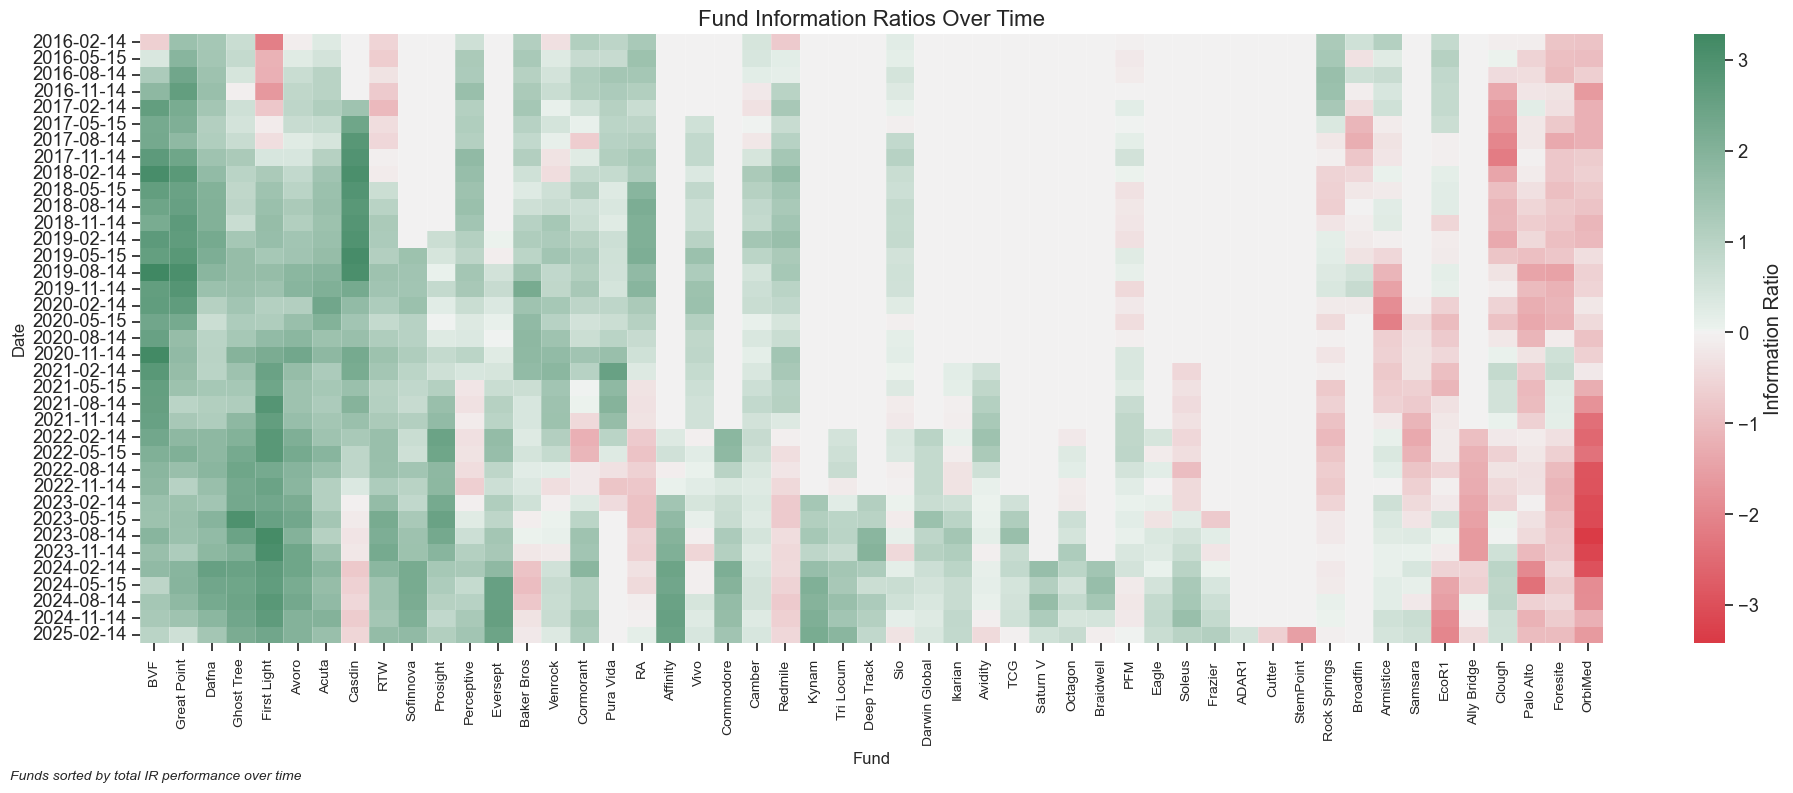

In [123]:
# Create a pivot table for IR values over time
ir_pivot = ir_df.pivot(index='date', columns='fund', values='regression_t_stat')
ir_pivot = ir_pivot.fillna(0)

# Calculate the sum of IR values over all time for each fund
fund_ir_sums = ir_pivot.sum()

# Sort funds by their total IR sum over all time
sorted_funds = fund_ir_sums.sort_values(ascending=False).index
ir_pivot = ir_pivot[sorted_funds]

# Create a diverging colormap centered at 0 with green for positive and red for negative
custom_cmap = sns.diverging_palette(10, 145, as_cmap=True)  # Green for positive, red for negative

# Plot - IR values with increased width to show all funds
plt.figure(figsize=(20, 8))  # Increased width to show all funds
ax1 = sns.heatmap(ir_pivot, cmap=custom_cmap, center=0, cbar_kws={'label': 'Information Ratio'})

plt.title('Fund Information Ratios Over Time', fontsize=16)
plt.xlabel('Fund', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Rotate x-axis labels for better readability and ensure all are visible
plt.xticks(rotation=90, fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)  # Add padding for x-axis labels

# Format dates on y-axis
date_format = plt.matplotlib.dates.DateFormatter('%Y-%m-%d')
ax1.yaxis.set_major_formatter(date_format)

# Fix the yticks issue by getting the correct number of ticks
y_locs = np.arange(len(ir_pivot.index)) + 0.5  # Center of each cell
y_labels = [d.strftime('%Y-%m-%d') for d in ir_pivot.index]
plt.yticks(y_locs, y_labels)

# Add grid lines to make it easier to track across the chart
ax1.grid(False)  # Turn off the default grid
for i in range(len(sorted_funds)):
    plt.axvline(x=i, color='white', linewidth=0.5, alpha=0.3)

# Add a descriptive annotation
plt.figtext(0.01, 0.01, "Funds sorted by total IR performance over time", 
            fontsize=10, style='italic')

# Ensure all labels are visible
plt.tight_layout()
plt.show()

In [133]:
# Equal weight top quartile of funds using percentile filtering with persistence requirement
fund_status = {}  # Track fund status: 'in', 'out', 'pending_in', 'pending_out'
fund_first_appearance = {}  # Track when each fund first appears

for i, date in enumerate(sorted(ir_df['date'].unique())):
    date_mask = ir_df['date'] == date
    
    # Track first appearance of each fund
    for fund in ir_df.loc[date_mask, 'fund'].values:
        if fund not in fund_first_appearance:
            fund_first_appearance[fund] = i
    
    # Filter to only include funds that have been around for at least 8 quarters
    eligible_funds_mask = ir_df.loc[date_mask, 'fund'].apply(lambda x: i - fund_first_appearance[x] >= 8)
    eligible_data = ir_df.loc[date_mask & eligible_funds_mask]
    
    # Calculate percentile ranks for regression_t_stat for eligible funds only
    if len(eligible_data) > 0:
        percentiles = eligible_data['regression_t_stat'].rank(pct=True)
        
        # Identify funds in top quartile among eligible funds
        top_quartile_mask = percentiles >= 0.75
        current_top_quartile = set(eligible_data.loc[top_quartile_mask, 'fund'].values)
    else:
        current_top_quartile = set()
    
    # Initialize all weights to 0
    ir_df.loc[date_mask, 'weight'] = 0
    
    if i == 0:  # First quarter - initialize status
        for fund in ir_df.loc[date_mask, 'fund']:
            if fund in current_top_quartile:
                fund_status[fund] = 'in'
            else:
                fund_status[fund] = 'out'
    else:
        # Update fund status based on persistence logic
        for fund in ir_df.loc[date_mask, 'fund']:
            current_status = fund_status.get(fund, 'out')
            in_top_quartile = fund in current_top_quartile
            
            if current_status == 'in':
                if not in_top_quartile:
                    fund_status[fund] = 'pending_out'
                # If in top quartile, stay 'in'
            elif current_status == 'out':
                if in_top_quartile:
                    fund_status[fund] = 'pending_in'
                # If not in top quartile, stay 'out'
            elif current_status == 'pending_in':
                if in_top_quartile:
                    fund_status[fund] = 'in'
                else:
                    fund_status[fund] = 'out'
            elif current_status == 'pending_out':
                if in_top_quartile:
                    fund_status[fund] = 'in'
                else:
                    fund_status[fund] = 'out'
    
    # Set weights for funds based on their status
    included_funds = [fund for fund, status in fund_status.items() if status in ['in', 'pending_out']]
    
    total_weight_units = len(included_funds)
    
    if total_weight_units > 0:
        # Full weight for included funds
        for fund in included_funds:
            fund_mask = (date_mask) & (ir_df['fund'] == fund)
            ir_df.loc[fund_mask, 'weight'] = 1/total_weight_units


# Create a blank DataFrame with all securities from sec_rets_df and all dates from ir_df
all_dates = ir_df['date'].unique()
all_securities = bt.sec_rets_df.columns.tolist()
final_holdings = pd.DataFrame(0.0, index=all_dates, columns=all_securities)

for date in all_dates:
    # Get the funds and their weights for that date
    funds_on_date = ir_df[ir_df['date'] == date]
    for fund, weight in zip(funds_on_date['fund'], funds_on_date['weight']):
        # Only add values for columns that exist in both DataFrames
        try:
            columns = fund_holdings[fund].columns
            final_holdings.loc[date, columns] += (fund_holdings[fund].loc[date, columns])*weight
        except KeyError:
            print(f"Skipping {fund} for date {date} - no holdings data available")
            continue

final_holdings[final_holdings < 0] = 0

# Renormalize by dividing each row by its sum
row_sums = final_holdings.sum(axis=1)
final_holdings = final_holdings.div(row_sums, axis=0)

final_holdings = bt.adjust_holdings(final_holdings, max_participation=0.2, port_size=100000000, n=100)

Portfolio size was: 100000000 dollars.
Problematic Dates and Actual Weight Sums:
  Date: 2016-02-14, Max Portfolio Capacity: 0.000000
  Date: 2016-05-15, Max Portfolio Capacity: 0.000000
  Date: 2016-08-14, Max Portfolio Capacity: 0.000000
  Date: 2016-11-14, Max Portfolio Capacity: 0.000000
  Date: 2017-02-14, Max Portfolio Capacity: 0.000000
  Date: 2017-05-15, Max Portfolio Capacity: 0.000000
  Date: 2017-08-14, Max Portfolio Capacity: 0.000000
  Date: 2017-11-14, Max Portfolio Capacity: 0.000000
  Date: 2018-02-14, Max Portfolio Capacity: 0.000000


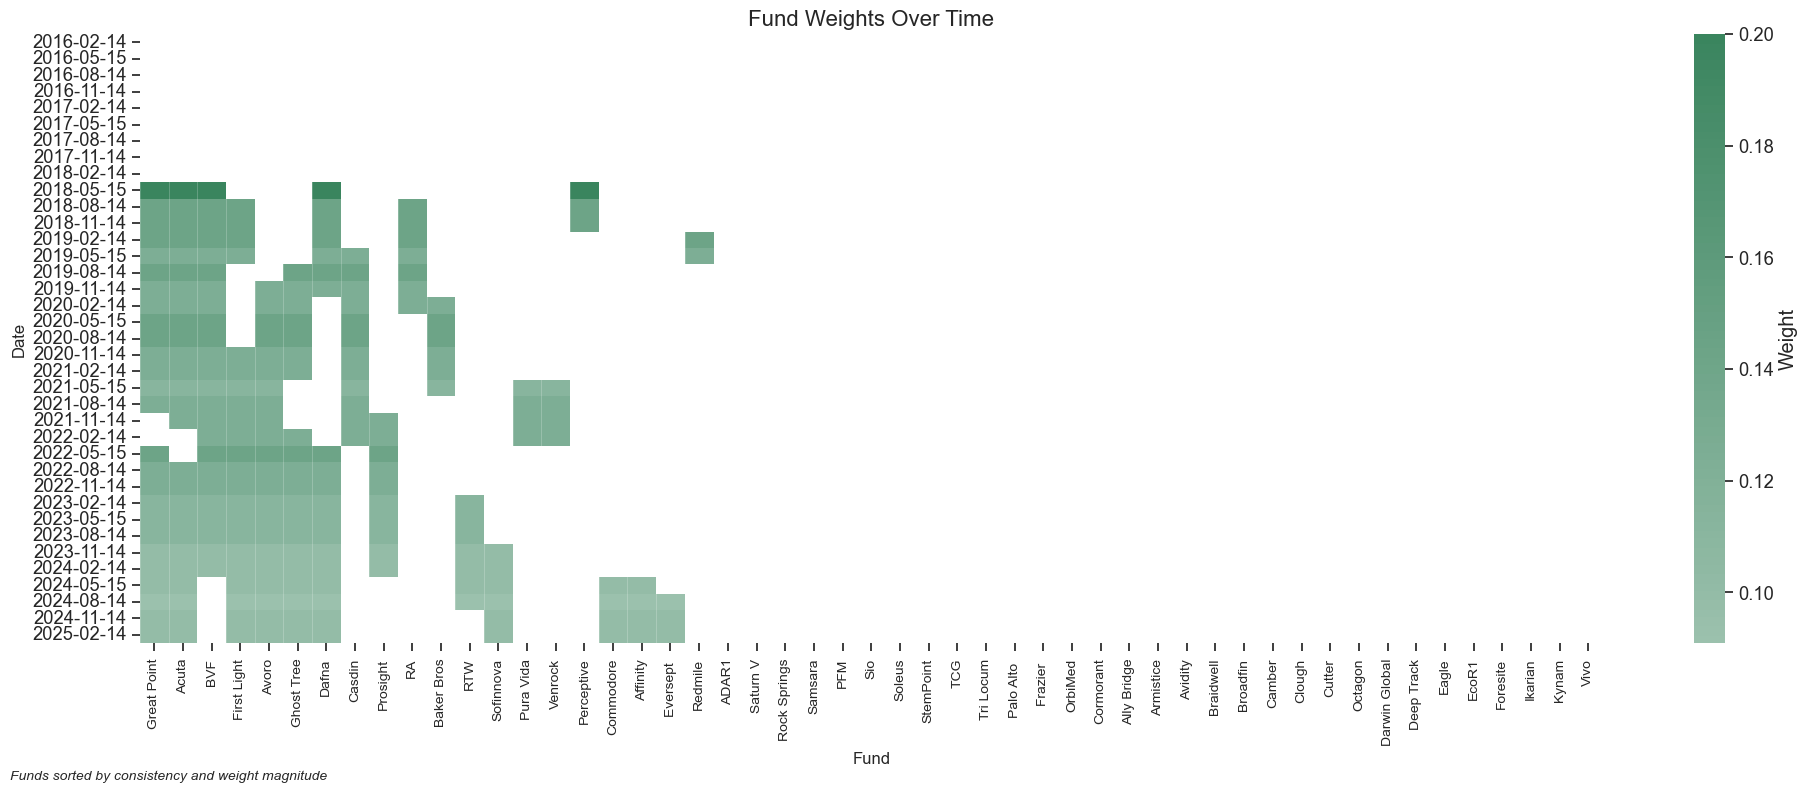

In [134]:
weight_pivot = ir_df.pivot(index='date', columns='fund', values='weight')
# Replace zeros with NaN for better visualization
weight_pivot = weight_pivot.replace(0, np.nan)

# Calculate the sum of weights over all time for each fund
fund_weight_sums = weight_pivot.sum()

# Sort funds by their total weight sum over all time
sorted_funds = fund_weight_sums.sort_values(ascending=False).index
weight_pivot = weight_pivot[sorted_funds]

# Create a diverging colormap centered at 0 with green for positive and red for negative
custom_cmap = sns.diverging_palette(10, 145, as_cmap=True)  # Changed order to make green positive

# Plot - Regular weights with increased width to show all funds
plt.figure(figsize=(20, 8))  # Increased width from 12 to 20
ax1 = sns.heatmap(weight_pivot, cmap=custom_cmap, center=0, cbar_kws={'label': 'Weight'})

plt.title('Fund Weights Over Time', fontsize=16)
plt.xlabel('Fund', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Rotate x-axis labels for better readability and ensure all are visible
plt.xticks(rotation=90, fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)  # Add padding for x-axis labels

# Format dates on y-axis
date_format = plt.matplotlib.dates.DateFormatter('%Y-%m-%d')
ax1.yaxis.set_major_formatter(date_format)

# Fix the yticks issue by getting the correct number of ticks
y_locs = np.arange(len(weight_pivot.index)) + 0.5  # Center of each cell
y_labels = [d.strftime('%Y-%m-%d') for d in weight_pivot.index]
plt.yticks(y_locs, y_labels)

# Add grid lines to make it easier to track across the chart
ax1.grid(False)  # Turn off the default grid
for i in range(len(sorted_funds)):
    plt.axvline(x=i, color='white', linewidth=0.5, alpha=0.3)

# Add a descriptive annotation
plt.figtext(0.01, 0.01, "Funds sorted by consistency and weight magnitude", 
            fontsize=10, style='italic')

# Ensure all labels are visible
plt.tight_layout()
plt.show()


In [21]:
returns, ctr, weights = bt.get_strategy_returns(final_holdings, end_date = pd.Timestamp('2025-05-15'))
returns.to_clipboard()

In [22]:
# Convert final_holdings to long format with Ticker column and filter out non-positive weights
final_holdings_long = final_holdings.reset_index().melt(
    id_vars='index',
    var_name='Ticker',
    value_name='Weight'
).query('Weight > 0').sort_values(['index', 'Weight'], ascending=[True, False])  # Sort by date then by weight descending

# Copy to clipboard
final_holdings_long.to_clipboard()


In [32]:
start_date = pd.Timestamp('2025-05-11') 
end_date = start_date

init_weight = weights.loc[start_date][weights.loc[start_date] > 0]

tickers = init_weight.index.values

returns = bt.sec_rets_df[tickers].loc[start_date:end_date]
returns = (1 + returns).prod() - 1

# Create DataFrame with ticker as index and required columns
result_df = pd.DataFrame({
    'Starting Weight': init_weight,
    'Return': returns,
    'Contribution': init_weight * returns
})

# Sort by contribution
result_df = result_df.sort_values('Contribution', ascending=False)

result_df.to_clipboard()


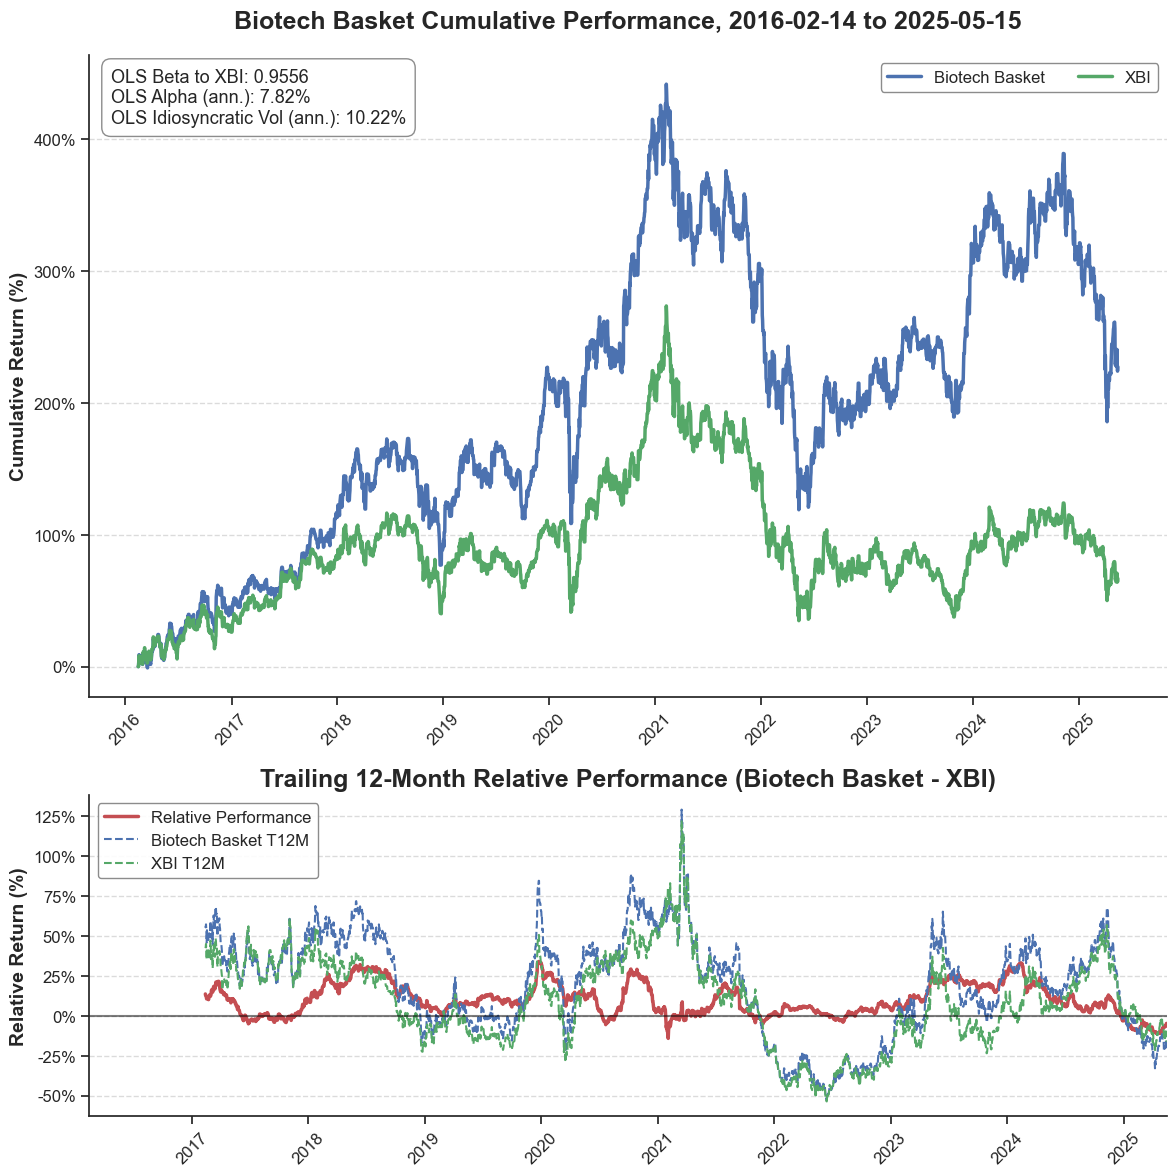

In [131]:
# Get strategy returns and XBI returns
strategy_returns, ctr, _ = bt.get_strategy_returns(final_holdings, pd.Timestamp('2025-05-15'))
xbi_returns = bt.sec_rets_df['XBI US'].loc[strategy_returns.index[0]:strategy_returns.index[-1]]

# Convert to cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod() - 1
xbi_cumulative = (1 + xbi_returns).cumprod() - 1

# Create a DataFrame for plotting
cumulative_returns = pd.DataFrame({
    'Biotech Basket': strategy_cumulative,
    'XBI': xbi_cumulative
})

# Calculate trailing 12-month cumulative returns for both strategy and XBI
strategy_t12m = (1 + strategy_returns).rolling(window=365).apply(lambda x: x.prod()) - 1
xbi_t12m = (1 + xbi_returns).rolling(window=365).apply(lambda x: x.prod()) - 1

# Calculate trailing 12-month relative performance (Strategy T12M - XBI T12M)
trailing_12m_relative = strategy_t12m - xbi_t12m
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Compute beta and alpha to XBI for regular strategy
returns_for_regression = pd.DataFrame({
    'strategy': strategy_returns,
    'xbi': xbi_returns
})
returns_for_regression = returns_for_regression.dropna()
returns_for_regression = returns_for_regression[(returns_for_regression['strategy'] != 0) | 
                                               (returns_for_regression['xbi'] != 0)]

# Add a constant to the regression model
X = sm.add_constant(returns_for_regression['xbi'])
Y = returns_for_regression['strategy']

# Fit the regression model
model = sm.OLS(Y, X).fit()
# Extract beta and alpha
beta = model.params['xbi']
alpha = model.params['const']
alpha_annualized = alpha * len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25)

idio_vol = model.resid.std()
idio_vol_annualized = idio_vol * np.sqrt(len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25))
# Set a professional theme and color palette
sns.set_theme(style="ticks", palette="colorblind", font="Arial", font_scale=1.2)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Plot 1: Cumulative Performance
colors = ["#4C72B0", "#55A868"]  # Different professional colors
ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=cumulative_returns, ax=ax1, linewidth=2.5, palette=colors, dashes=False)

# Format the plot
ax1.set_title(f"Biotech Basket Cumulative Performance, {cumulative_returns.index.min().strftime('%Y-%m-%d')} to {cumulative_returns.index.max().strftime('%Y-%m-%d')}", fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel("Cumulative Return (%)", fontsize=14, fontweight='bold')
ax1.set_xlabel("")  # Remove x-axis label
ax1.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Enhance legend
legend = ax1.legend(title="", loc='upper right', ncol=2, frameon=True, framealpha=0.9, 
                   fontsize=12, edgecolor='gray')
legend.get_frame().set_linewidth(1)

# Add metrics box with enhanced styling
metrics_text = (
    f"OLS Beta to XBI: {beta:.4f}\n"
    f"OLS Alpha (ann.): {alpha_annualized*100:.2f}%\n"
    f"OLS Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%"
)

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
                                          facecolor='white', 
                                          edgecolor='gray', 
                                          alpha=0.9,
                                          linewidth=1))

# Plot 2: Trailing 12-month Relative Performance
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=trailing_12m_relative, color="#C44E52", 
            ax=ax2, linewidth=2.5, label='Relative Performance')

# Add individual T12M returns as dotted lines
sns.lineplot(data=strategy_t12m, color="#4C72B0", ax=ax2, 
            linewidth=1.5, linestyle='--', label='Biotech Basket T12M')
sns.lineplot(data=xbi_t12m, color="#55A868", ax=ax2, 
            linewidth=1.5, linestyle='--', label='XBI T12M')

# Format the second plot
ax2.set_title("Trailing 12-Month Relative Performance (Biotech Basket - XBI)", 
             fontsize=18, fontweight='bold')
ax2.set_ylabel("Relative Return (%)", fontsize=14, fontweight='bold')
ax2.set_xlabel("")  # Remove x-axis label
ax2.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legend for the second plot
ax2.legend(title="", loc='upper left', ncol=1, frameon=True, framealpha=0.9, 
          fontsize=12, edgecolor='gray')

# Ensure both plots have the same x-axis range
ax2.set_xlim(cumulative_returns.index.min(), cumulative_returns.index.max())

plt.tight_layout()
plt.show()


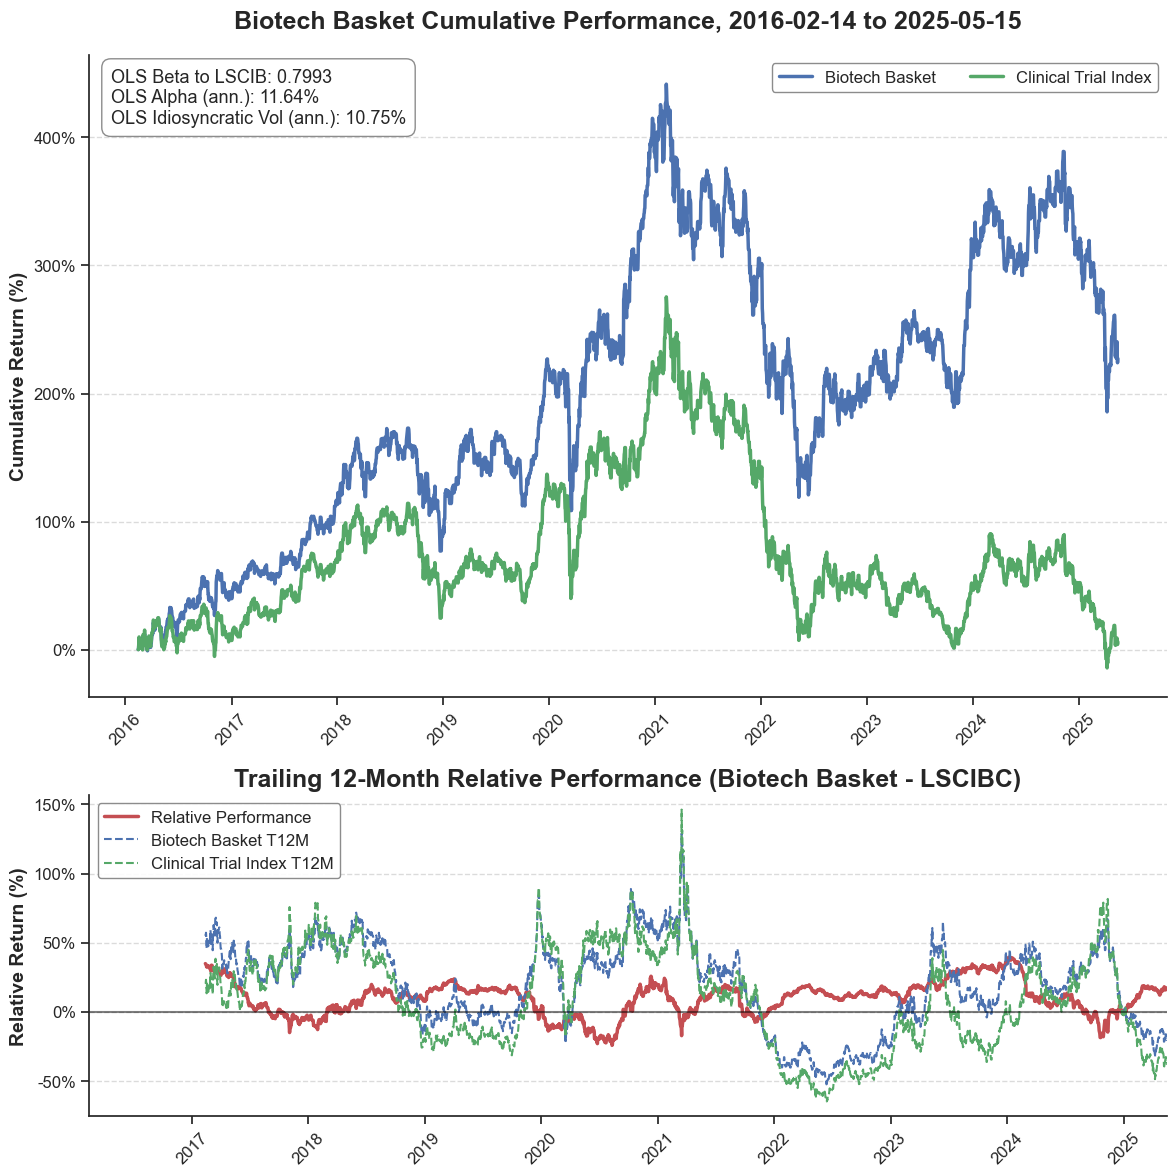

In [130]:
# Get strategy returns and LSCIBreturns
strategy_returns, ctr, _ = bt.get_strategy_returns(final_holdings, pd.Timestamp('2025-05-15'))
clinical_trial_index_returns = bt.sec_rets_df['LSCIBC'].loc[strategy_returns.index[0]:strategy_returns.index[-1]]

# Convert to cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod() - 1
clinical_trial_index_cumulative = (1 + clinical_trial_index_returns).cumprod() - 1

# Create a DataFrame for plotting
cumulative_returns = pd.DataFrame({
    'Biotech Basket': strategy_cumulative,
    'Clinical Trial Index': clinical_trial_index_cumulative
})

# Calculate trailing 12-month cumulative returns for both strategy and Clinical Trial Index
strategy_t12m = (1 + strategy_returns).rolling(window=365).apply(lambda x: x.prod()) - 1
clinical_trial_index_t12m = (1 + clinical_trial_index_returns).rolling(window=365).apply(lambda x: x.prod()) - 1

# Calculate trailing 12-month relative performance (Strategy T12M - Clinical Trial Index T12M)
trailing_12m_relative = strategy_t12m - clinical_trial_index_t12m

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Compute beta and alpha to LSCIB for regular strategy
returns_for_regression = pd.DataFrame({
    'strategy': strategy_returns,
    'lscibc': clinical_trial_index_returns
})
returns_for_regression = returns_for_regression.dropna()
returns_for_regression = returns_for_regression[(returns_for_regression['strategy'] != 0) | 
                                               (returns_for_regression['lscibc'] != 0)]

# Add a constant to the regression model
X = sm.add_constant(returns_for_regression['lscibc'])
Y = returns_for_regression['strategy']

# Fit the regression model
model = sm.OLS(Y, X).fit()
# Extract beta and alpha
beta = model.params['lscibc']
alpha = model.params['const']
alpha_annualized = alpha * len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25)

idio_vol = model.resid.std()
idio_vol_annualized = idio_vol * np.sqrt(len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25))

# Set a professional theme and color palette
sns.set_theme(style="ticks", palette="colorblind", font="Arial", font_scale=1.2)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Plot 1: Cumulative Performance
colors = ["#4C72B0", "#55A868"]  # Different professional colors
ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=cumulative_returns, ax=ax1, linewidth=2.5, palette=colors, dashes=False)

# Format the plot
ax1.set_title(f"Biotech Basket Cumulative Performance, {cumulative_returns.index.min().strftime('%Y-%m-%d')} to {cumulative_returns.index.max().strftime('%Y-%m-%d')}", fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel("Cumulative Return (%)", fontsize=14, fontweight='bold')
ax1.set_xlabel("")  # Remove x-axis label
ax1.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Enhance legend
legend = ax1.legend(title="", loc='upper right', ncol=2, frameon=True, framealpha=0.9, 
                   fontsize=12, edgecolor='gray')
legend.get_frame().set_linewidth(1)

# Add metrics box with enhanced styling
metrics_text = (
    f"OLS Beta to LSCIB: {beta:.4f}\n"
    f"OLS Alpha (ann.): {alpha_annualized*100:.2f}%\n"
    f"OLS Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%"
)

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
                                          facecolor='white', 
                                          edgecolor='gray', 
                                          alpha=0.9,
                                          linewidth=1))

# Plot 2: Trailing 12-month Relative Performance
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=trailing_12m_relative, color="#C44E52", 
            ax=ax2, linewidth=2.5, label='Relative Performance')

# Add individual T12M returns as dotted lines
sns.lineplot(data=strategy_t12m, color="#4C72B0", ax=ax2, 
            linewidth=1.5, linestyle='--', label='Biotech Basket T12M')
sns.lineplot(data=clinical_trial_index_t12m, color="#55A868", ax=ax2, 
            linewidth=1.5, linestyle='--', label='Clinical Trial Index T12M')

# Format the second plot
ax2.set_title("Trailing 12-Month Relative Performance (Biotech Basket - LSCIBC)", 
             fontsize=18, fontweight='bold')
ax2.set_ylabel("Relative Return (%)", fontsize=14, fontweight='bold')
ax2.set_xlabel("")  # Remove x-axis label
ax2.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legend for the second plot
ax2.legend(title="", loc='upper left', ncol=1, frameon=True, framealpha=0.9, 
          fontsize=12, edgecolor='gray')

# Ensure both plots have the same x-axis range
ax2.set_xlim(cumulative_returns.index.min(), cumulative_returns.index.max())

plt.tight_layout()
plt.show()

In [128]:
# Get the holdings for the specified date
holdings = final_holdings.loc[pd.Timestamp('2025-02-14')].dropna().loc[lambda x: x != 0]
# Sort by size (value) in descending order
sorted_holdings = holdings.sort_values(ascending=False)
# Convert to percentage and print the sorted holdings
percentage_holdings = sorted_holdings * 100
print(percentage_holdings)

# Calculate and print average, max, and min weights across all dates
hhi = (1/(final_holdings**2).sum(axis=1))
max_weight = final_holdings.max().max() * 100
print(f"Avg Effective Concentration: {hhi.mean():.2f}")
print(f"Minimum Effective Concentration: {hhi.min():.2f}")
print(f"Average max weight: {final_holdings.max(axis=1).mean()*100:.2f}%")
print(f"Maximum weight across all dates: {max_weight:.2f}%")



NTRA US    7.626226
PCVX US    3.795657
MRUS US    3.292270
VERA US    3.181954
XENE US    3.179777
CRNX US    2.630708
ASND US    2.537023
CNTA US    2.243367
VRDN US    2.153151
INSM US    2.098193
RVMD US    1.958189
CYTK US    1.940471
UTHR US    1.792519
ALKS US    1.777578
SNDX US    1.730133
SRPT US    1.701245
NUVL US    1.577347
SLNO US    1.558873
MDGL US    1.517001
TEVA IT    1.490818
BPMC US    1.390411
EWTX US    1.349228
CLDX US    1.317406
DVAX US    1.315491
OCUL US    1.268121
TWST US    1.261443
IONS US    1.188962
BCRX US    1.176298
AXSM US    1.090782
COGT US    1.088401
CGON US    1.000307
APGE US    1.000065
JANX US    0.992622
ELVN US    0.931189
TARS US    0.927234
IDYA US    0.903467
NGNE US    0.880630
RARE US    0.873980
SYRE US    0.873830
NRIX US    0.865447
WVE US     0.863502
ACLX US    0.784332
RVTY US    0.747916
APLS US    0.745089
MDXG US    0.712094
KYMR US    0.700428
PTGX US    0.670617
EOLS US    0.666156
KALV US    0.663857
KRYS US    0.646647


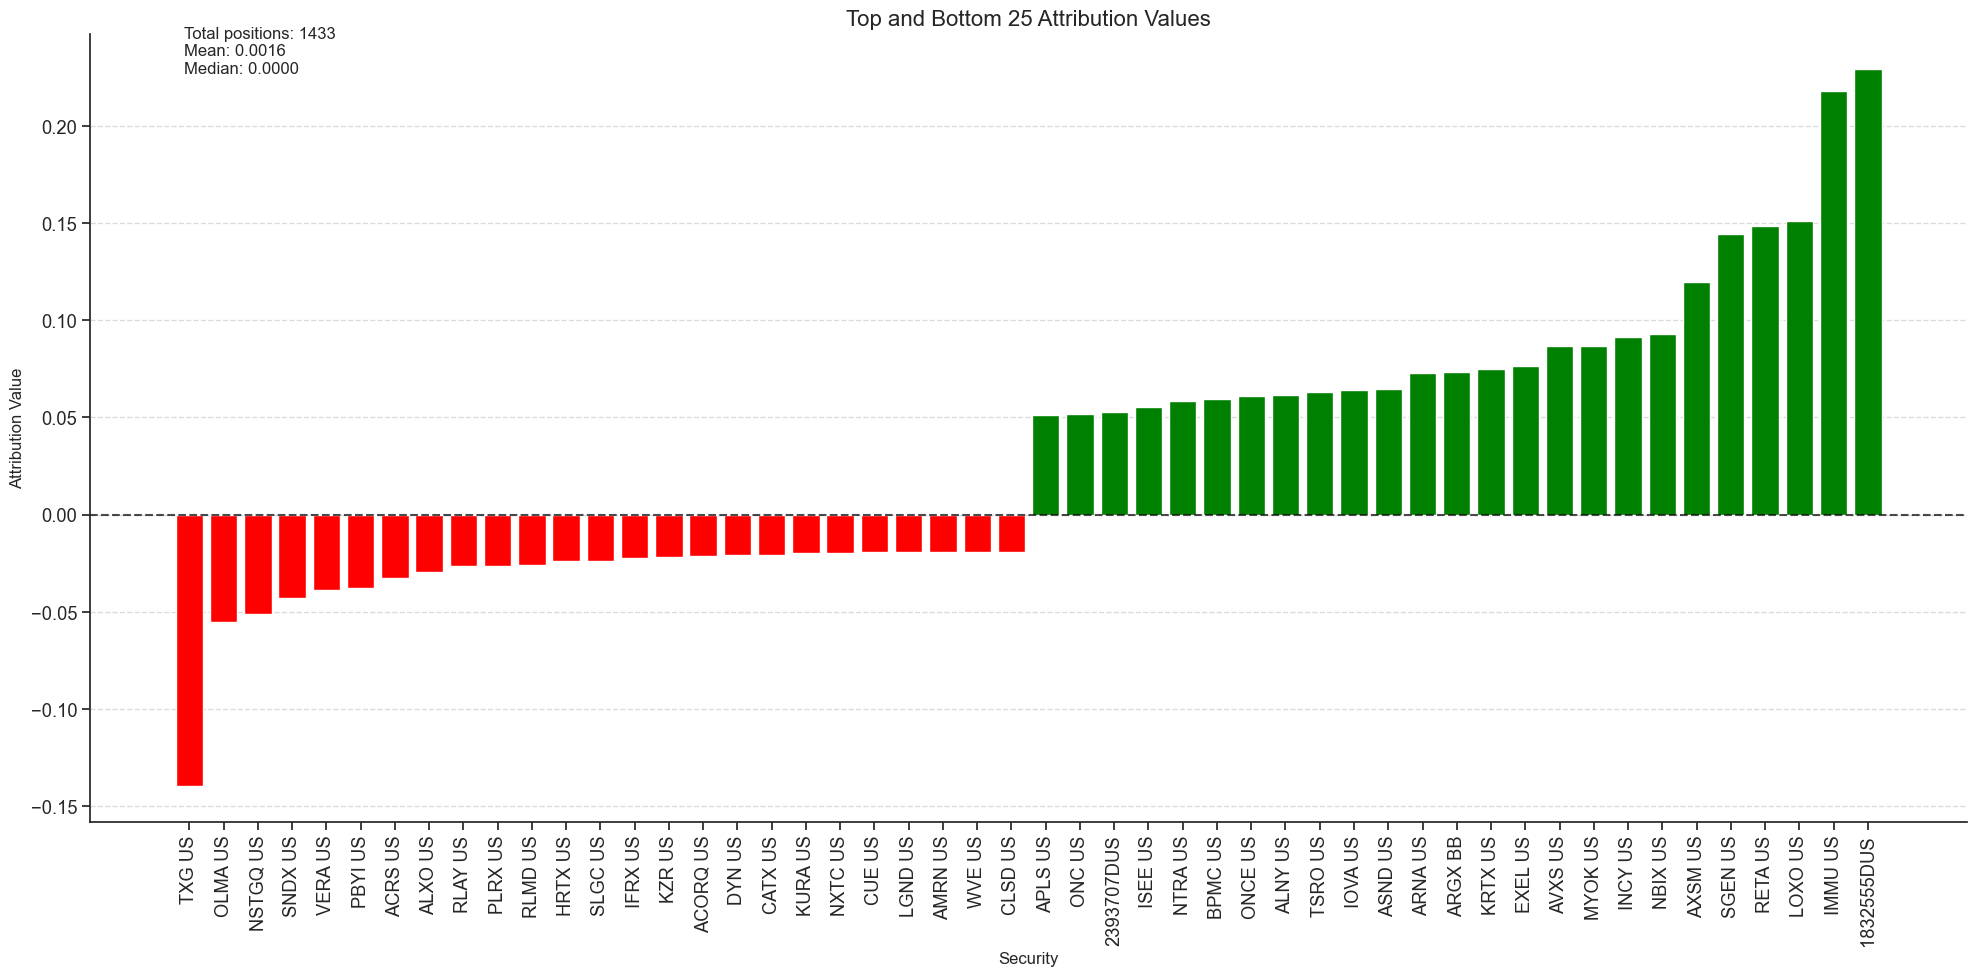

In [132]:
attr = FilingBacktester.carino_attribution(ctr)

# Sort all attribution values from smallest to largest
plot_data = attr.sort_values()

# Get the bottom 25 and top 25 attributions
bottom_25 = plot_data.head(25)
top_25 = plot_data.tail(25)

# Combine them into a single dataframe for plotting
combined_data = pd.concat([bottom_25, top_25])

# Create a bar plot for the top and bottom 25 attributions with wider figure
plt.figure(figsize=(20, 10))
bars = plt.bar(combined_data.index, combined_data.values, color=['red' if x < 0 else 'green' for x in combined_data.values])

# Add labels and title
plt.title('Top and Bottom 25 Attribution Values', fontsize=16)
plt.xlabel('Security', fontsize=12)
plt.ylabel('Attribution Value', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add summary statistics as text
plt.text(0.05, 0.95, f"Total positions: {len(attr)}\nMean: {plot_data.mean():.4f}\nMedian: {plot_data.median():.4f}", 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [140]:
factor_ctr = bt.get_factor_attribution(final_holdings, factor_scores, factor_rets, pd.Timestamp('2025-03-31'))
carino_factor_ctr = FilingBacktester.carino_attribution(factor_ctr)
print(carino_factor_ctr)
print(carino_factor_ctr.sum())
print(carino_factor_ctr/carino_factor_ctr.sum())

Size       -1.265497
Momentum    0.392366
Reversal    0.392624
Market      1.342598
Idio        1.832298
dtype: float64
2.6943887276593346
Size       -0.469679
Momentum    0.145624
Reversal    0.145719
Market      0.498294
Idio        0.680042
dtype: float64


C:\Users\NWeatherly\AppData\Local\Temp\ipykernel_51804\1944925703.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\NWeatherly\AppData\Local\Temp\ipykernel_51804\1944925703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


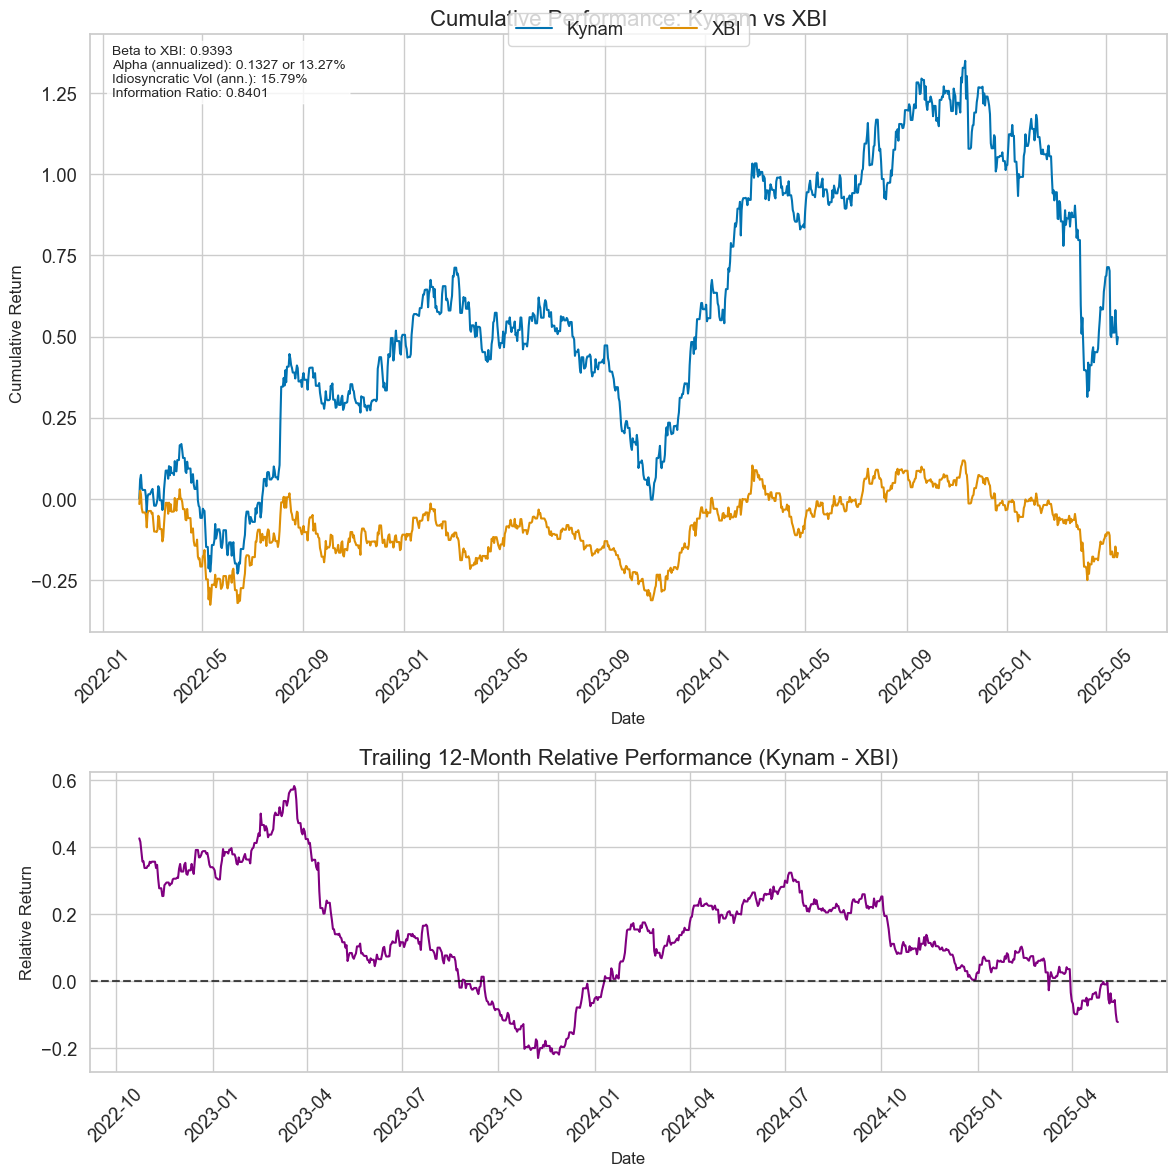

In [83]:
# Set the Master fund to analyze
master_fund = "Kynam"  # Change this to the fund you want to analyze

# Get the fund's holdings
holdings = fund_holdings[master_fund]
holdings = bt.adjust_holdings(holdings, max_participation=0.2, port_size=10000000)

perf = bt.get_strategy_returns(holdings, max(holdings.index)+pd.Timedelta(days=90))

# Get XBI returns for comparison
xbi = bt.sec_rets_df['XBI US'].loc[perf.index[0]:perf.index[-1]]
xbi_cum_perf = (1+xbi).cumprod()-1

# Replace NaN values with 0 to avoid issues in cumulative performance calculation
perf = perf.fillna(0)
cum_perf = (1+perf).cumprod()-1

# Calculate trailing 12-month relative performance
trailing_12m = pd.DataFrame({
    master_fund: perf.rolling(252).sum(),
    'XBI': xbi.rolling(252).sum()
})
trailing_12m_relative = trailing_12m[master_fund] - trailing_12m['XBI']

# Calculate regression metrics
X = sm.add_constant(xbi)
model = sm.OLS(perf, X).fit()
beta = model.params[1]
alpha = model.params[0]
alpha_annualized = alpha * 252
idio_vol = np.std(model.resid)
idio_vol_annualized = idio_vol * np.sqrt(252)
information_ratio = alpha_annualized / idio_vol_annualized

# Create a DataFrame for cumulative returns
cumulative_returns = pd.DataFrame({
    master_fund: cum_perf,
    'XBI': xbi_cum_perf
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Cumulative Performance
sns.set_style("whitegrid")
sns.lineplot(data=cumulative_returns, dashes=False, ax=ax1)
ax1.set_title(f"Cumulative Performance: {master_fund} vs XBI", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Cumulative Return", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Add text box with metrics to the top left corner of the main plot
metrics_text = (f"Beta to XBI: {beta:.4f}\n"
                f"Alpha (annualized): {alpha_annualized:.4f} or {alpha_annualized*100:.2f}%\n"
                f"Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%\n"
                f"Information Ratio: {information_ratio:.4f}")

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Trailing 12-month Relative Performance
sns.lineplot(data=trailing_12m_relative, color='purple', ax=ax2)
ax2.set_title(f"Trailing 12-Month Relative Performance ({master_fund} - XBI)", fontsize=16)
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Relative Return", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()